<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Exploring_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/MiklyaeveAV.csv"
data = pd.read_csv(file_path)
data

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,1,1,3,2,5,0,100,7,4,63.64,...,2,0,0,1,3,3,0,19,4,1
1,2,1,0,4,5,1,90,4,7,36.36,...,0,0,1,0,3,2,0,22,5,1
2,3,1,0,3,4,3,70,6,5,54.55,...,0,0,0,0,3,3,0,18,5,1
3,4,1,0,3,7,0,100,10,1,90.91,...,2,1,2,3,3,0,0,24,5,2
4,5,1,0,2,8,0,100,9,2,81.82,...,1,2,0,2,4,2,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,0,10,0,0,0,100,11,0,100.00,...,0,0,0,0,0,0,1,18,4,1
565,566,0,0,1,8,1,90,9,2,81.82,...,2,2,2,2,2,2,0,15,2,1
566,567,0,2,1,2,3,50,6,5,54.55,...,3,4,2,4,4,1,0,14,3,1
567,568,0,1,0,9,0,100,10,1,90.91,...,3,0,2,0,2,4,0,16,3,1


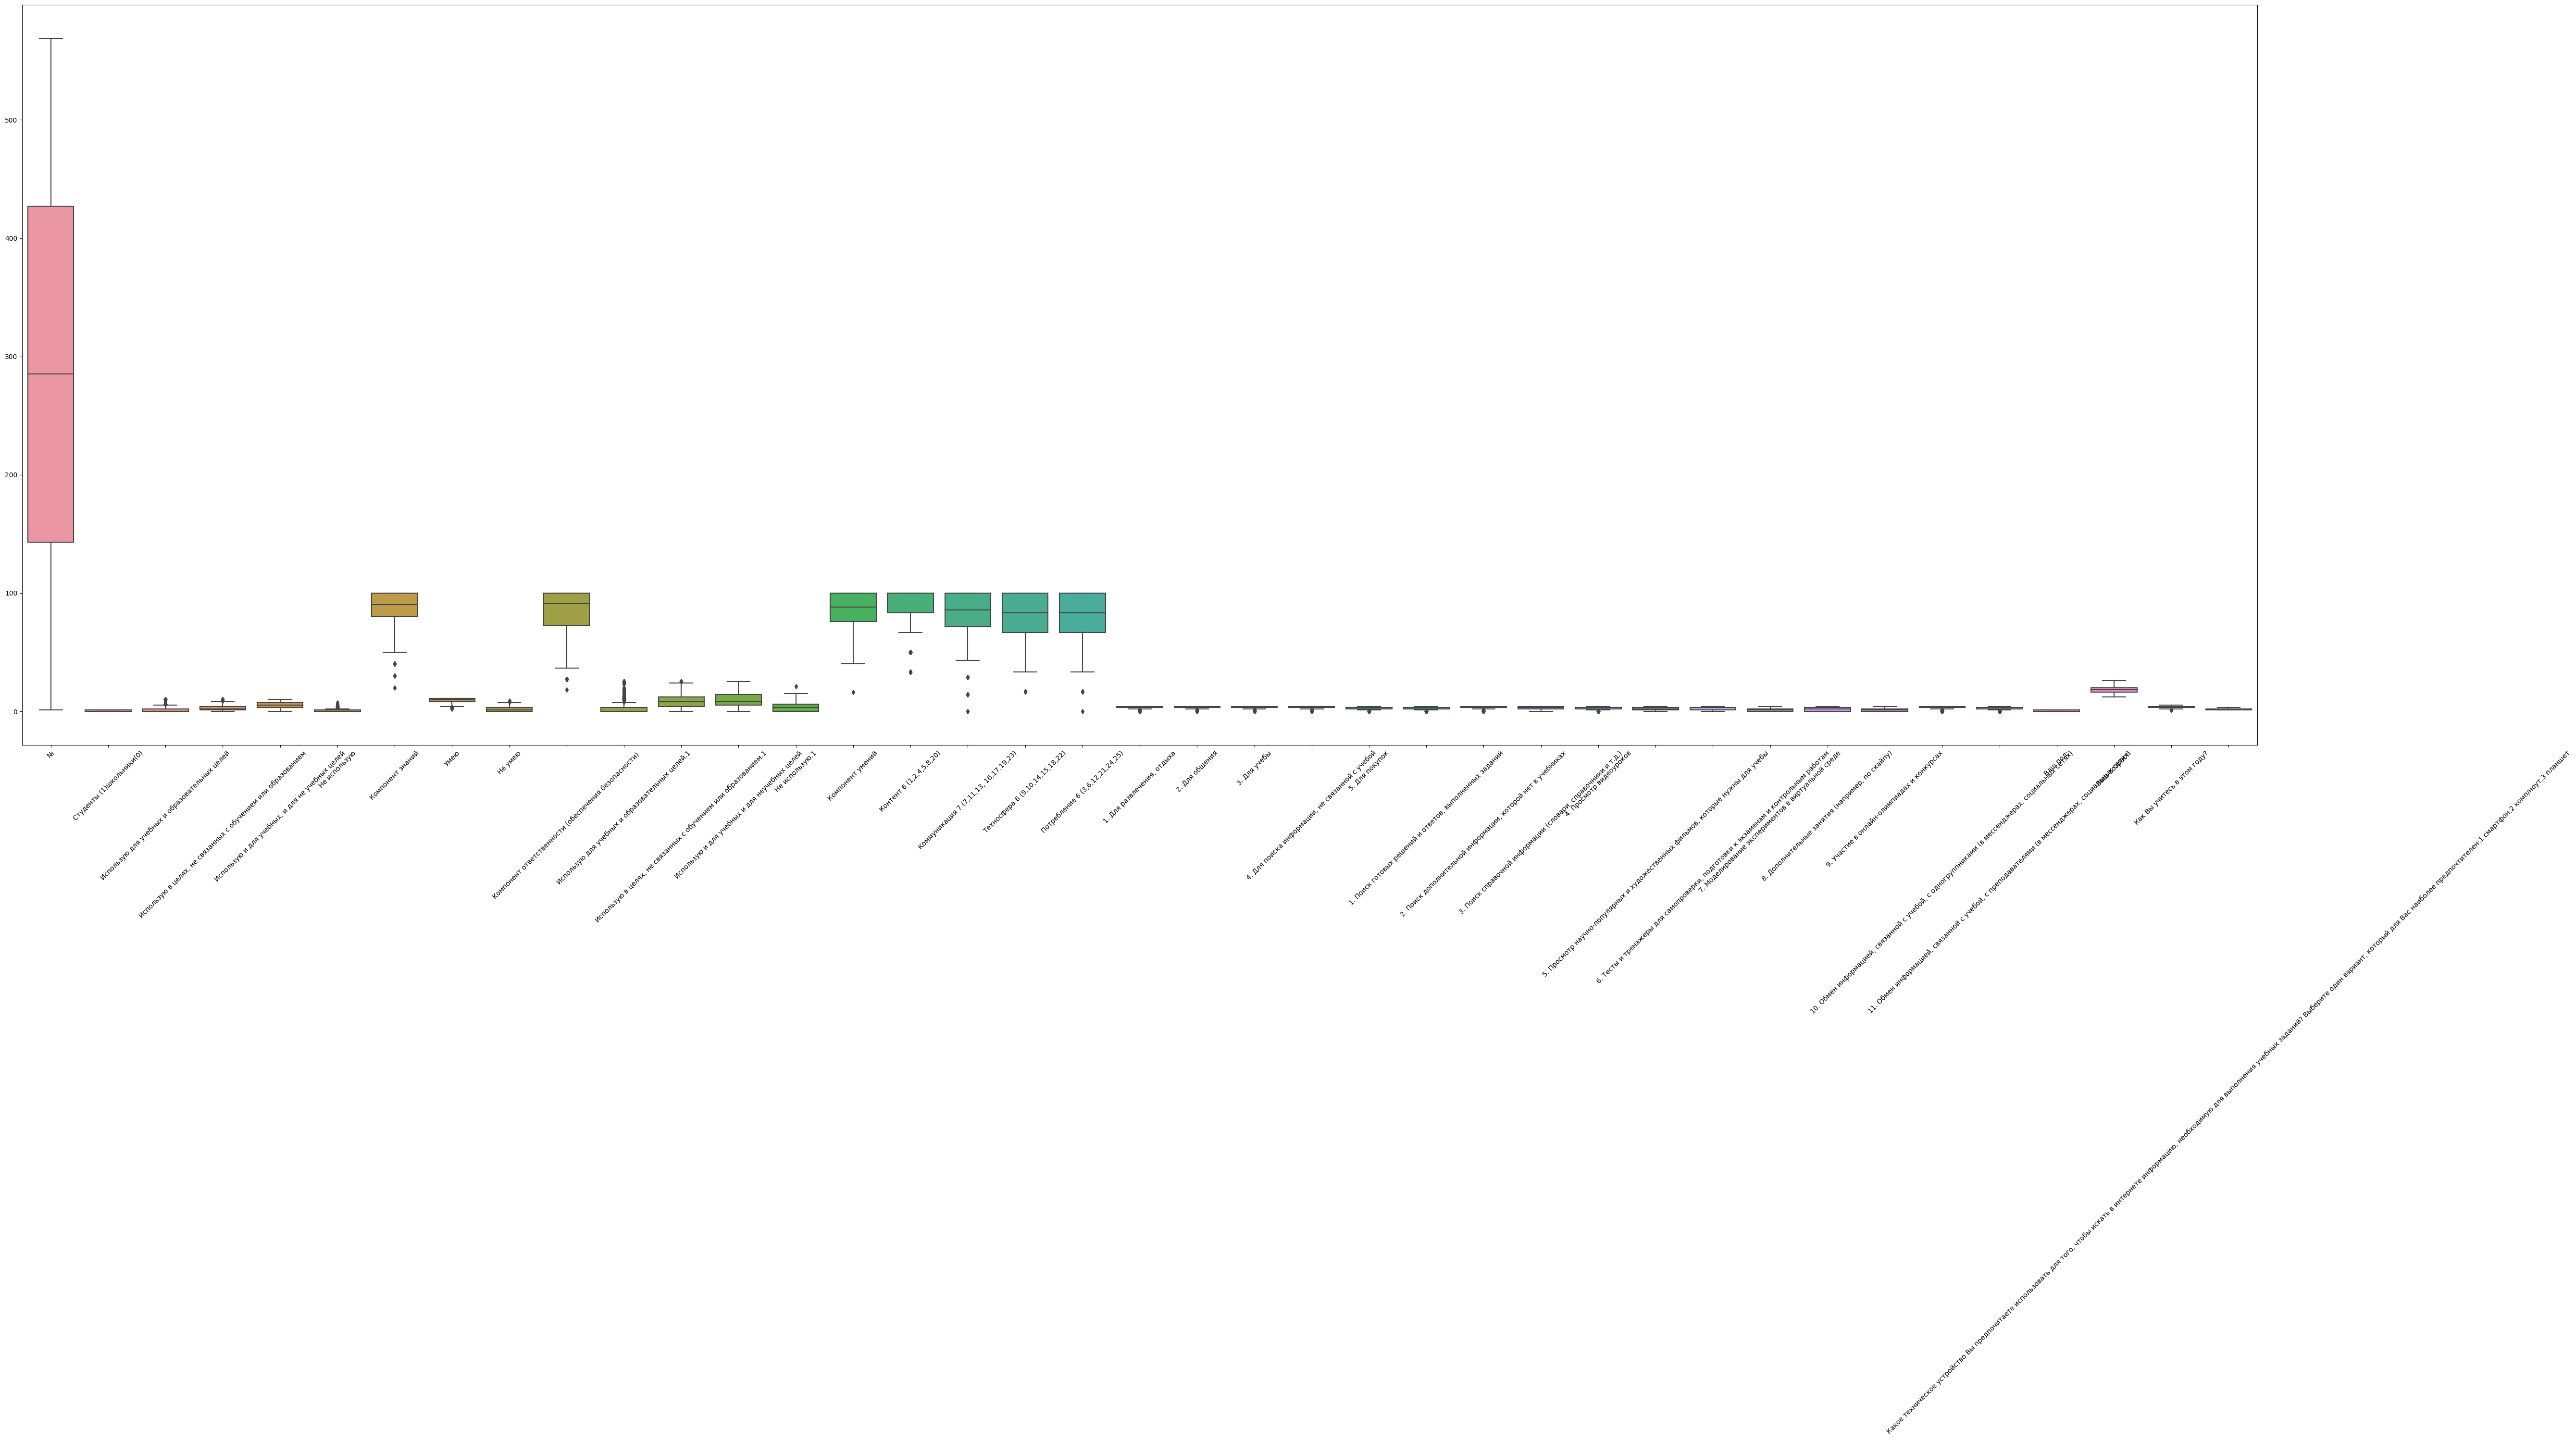

In [19]:
fig,ax = plt.subplots(1,figsize=(60, 20))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [26]:
import pandas as pd

# Create an empty DataFrame to store the outliers
outliers_df = pd.DataFrame(columns=['Variable', 'Outlier Values'])

# Calculate and store the outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    if not outliers.empty:
        outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)

# Display the table with outliers
print("Outliers Table:")
display(HTML(outliers_df.to_html()))


<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

Outliers Table:


<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-26-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,Variable,Outlier Values
0,Использую для учебных и образовательных целей,"[6, 8, 10, 10, 10, 10, 6, 9, 6, 9, 8, 10, 10, 6, 7, 10, 10, 6, 10, 10, 8, 6, 10, 10, 6, 7, 10, 6, 10]"
1,"Использую в целях, не связанных с обучением или образованием","[10, 9, 10, 9, 10, 10]"
2,Не использую,"[3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 7, 5, 4, 4, 3, 6, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 5, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3]"
3,Компонент знаний,"[20, 40, 40, 40, 30, 40, 40, 40, 30]"
4,Умею,"[2, 3, 3, 3, 3, 3, 3, 3, 3, 3]"
5,Не умею,"[9, 8, 8, 8, 8, 8, 8, 8, 8, 8]"
6,Компонент ответственности (обеспечения безопасности),"[18.18, 27.27, 27.27, 27.27, 27.27, 27.27, 27.27, 27.27, 27.27, 27.27]"
7,Использую для учебных и образовательных целей.1,"[11, 13, 13, 15, 11, 18, 8, 25, 25, 8, 24, 18, 11, 23, 10, 17, 19, 18, 13, 9, 13, 10, 25, 11, 25, 12, 10, 10, 11, 25, 8, 8, 19, 8, 16, 16, 18, 11, 14, 25, 25, 25, 10, 25, 25, 8, 8, 8, 20, 11, 25, 12, 25, 9, 13, 25, 10, 11, 25, 14, 19, 11, 13, 23, 11, 25]"
8,"Использую в целях, не связанных с обучением или образованием.1","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]"
9,Не использую.1,[21]


In [7]:
! pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 18.9 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=90299fa0b494a7ec1b6715b52a166ce1d9d5f77d1110df80fc73984e6a06460d
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [8]:
# path to file in google drive

file_pupils = "/content/gdrive/My Drive/Colab Notebooks/pupils.csv"
pupils = pd.read_csv(file_pupils)
pupils

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,307,0,1,4,4,1,90,6,5,54.55,...,4,0,4,4,4,4,0,18,3,1
1,308,0,0,2,8,0,100,10,1,90.91,...,2,2,1,1,3,1,0,15,4,1
2,309,0,9,1,0,0,100,8,3,72.73,...,4,4,4,4,4,4,0,18,4,1
3,310,0,3,3,2,1,80,11,0,100.00,...,4,2,4,4,4,1,1,15,5,1
4,311,0,5,2,2,1,90,11,0,100.00,...,1,1,1,4,0,0,1,15,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,565,0,10,0,0,0,100,11,0,100.00,...,0,0,0,0,0,0,1,18,4,1
259,566,0,0,1,8,1,90,9,2,81.82,...,2,2,2,2,2,2,0,15,2,1
260,567,0,2,1,2,3,50,6,5,54.55,...,3,4,2,4,4,1,0,14,3,1
261,568,0,1,0,9,0,100,10,1,90.91,...,3,0,2,0,2,4,0,16,3,1


In [9]:
# path to file in google drive

file_students = "/content/gdrive/My Drive/Colab Notebooks/students.csv"
students = pd.read_csv(file_students)
students

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,1,1,3,2,5,0,100,7,4,63.64,...,2,0,0,1,3,3,0,19,4,1
1,2,1,0,4,5,1,90,4,7,36.36,...,0,0,1,0,3,2,0,22,5,1
2,3,1,0,3,4,3,70,6,5,54.55,...,0,0,0,0,3,3,0,18,5,1
3,4,1,0,3,7,0,100,10,1,90.91,...,2,1,2,3,3,0,0,24,5,2
4,5,1,0,2,8,0,100,9,2,81.82,...,1,2,0,2,4,2,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,302,1,0,0,9,0,90,11,0,100.00,...,2,2,2,1,3,2,0,24,5,2
302,303,1,1,1,7,0,90,10,1,90.91,...,0,0,0,1,3,1,1,21,4,2
303,304,1,0,0,9,0,90,7,4,63.64,...,3,0,2,0,3,3,0,20,4,1
304,305,1,0,2,8,0,100,11,0,100.00,...,2,0,0,0,4,2,0,19,4,1


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Total 24.42% Cumulative Variance explained by the 1 factors
Total 37.83% Cumulative Variance explained by the 2 factors
Total 45.91% Cumulative Variance explained by the 3 factors
Total 50.66% Cumulative Variance explained by the 4 factors
Total 54.77% Cumulative Variance explained by the 5 factors
Total 58.03% Cumulative Variance explained by the 6 factors
Total 61.42% Cumulative Variance explained by the 7 factors
Total 62.68% Cumulative Variance explained by the 8 factors
Total 66.39% Cumulative Variance explained by the 9 factors
Total 69.95% Cumulative Variance explained by the 10 factors
Total 72.68% Cumulative Variance explained by the 11 factors
Total 74.88% Cumulative Variance explained by the 12 factors
Total 76.67% Cumulative Variance explained by the 13 factors
Total 70.83% Cumulative Variance explained by the 14 factors
Total 71.15% Cumulative Variance explained by the 15 factors
Total 71.43% Cumulative Variance explained by the 16 factors
Total 71.43% Cumulative Variance 

,Factor 1,Factor 2,Factor 3
Не использую,-0.686867,-0.351091,0.367734
Компонент знаний,0.650705,0.376421,-0.439019
Компонент умений,0.941119,-0.047834,0.357972
"Контент 6 (1,2,4,5,8,20)",0.680875,0.058940,0.161508
"Коммуникация 7 (7,11,13, 16,17,19,23)",0.711138,0.051204,0.134732
"Потребление 6 (3,6,12,21,24,25)",0.690688,0.039544,0.253610
2. Для общения,0.115494,0.369945,0.058490
3. Для учебы,-0.017728,0.625038,0.094512
5. Для покупок,0.271954,0.288041,0.259762
"1. Поиск готовых решений и ответов, выполненных заданий",0.089881,0.203150,0.188413


Bartlett’s Test:
Chi-Square Value: 4569.443909378792
P-value: 0.0

Kaiser-Meyer-Olkin (KMO) Test:
KMO Overall: [0.68821397 0.68235532 0.60626364 0.66570719 0.64329838 0.63637714
 0.71411776 0.82623276 0.85745301 0.82491484 0.79702598 0.80618936
 0.87656446 0.86142189 0.79697708 0.78003521 0.81546131]
KMO Model: 0.7251143997637334


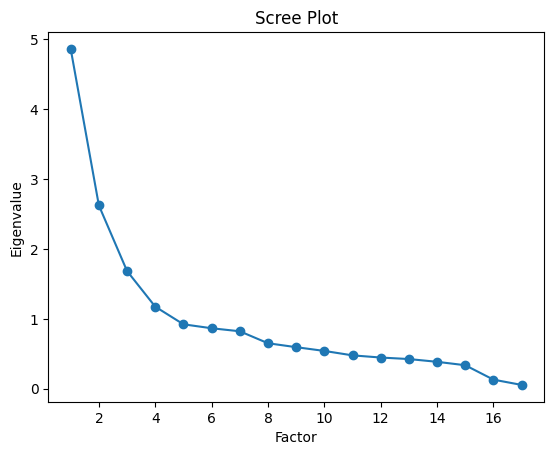

Descriptive Statistics:


,Не использую,Компонент знаний,Компонент умений,"Контент 6 (1,2,4,5,8,20)","Коммуникация 7 (7,11,13, 16,17,19,23)","Потребление 6 (3,6,12,21,24,25)",2. Для общения,3. Для учебы,5. Для покупок,"1. Поиск готовых решений и ответов, выполненных заданий","2. Поиск дополнительной информации, которой нет в учебниках","3. Поиск справочной информации (словари, справочники и т.д.)",4. Просмотр видеоуроков,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)"
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.861160,87.820738,84.014060,88.663761,86.290826,82.600492,3.151142,3.022847,2.692443,2.353251,3.012302,2.927944,2.543058,2.311072,1.715290,1.456942,3.045694
std,1.149121,14.685537,15.149948,15.882126,18.122345,20.072793,0.871095,0.906455,1.057483,1.129000,0.984845,1.015761,1.143872,1.268483,1.432690,1.347399,1.060504
min,0.000000,20.000000,16.000000,33.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,76.000000,83.330000,71.430000,66.670000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000
50%,0.000000,90.000000,88.000000,100.000000,85.710000,83.330000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000
75%,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Skewness,1.524050,-1.379682,-0.943157,-1.448637,-1.633633,-1.165377,-1.067541,-0.970199,-0.616120,-0.195625,-1.067836,-0.826215,-0.385916,-0.174017,0.299761,0.618342,-1.131159
Kurtosis,2.515724,1.792544,0.559848,1.582925,3.059077,0.851295,1.069526,0.997658,-0.170176,-0.714817,0.938701,0.188891,-0.691469,-1.045503,-1.238224,-0.776417,0.719577


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from IPython.display import display, HTML

# Assume you have loaded your data into the 'data' DataFrame
selected_variables = data
'''
# Specify the variables you want to include in the factor analysis
selected_variables = [
    'Не использую',
    'Компонент знаний',
    'Компонент умений',
    'Контент 6 (1,2,4,5,8,20)',
    'Коммуникация 7 (7,11,13, 16,17,19,23)',
    'Потребление 6 (3,6,12,21,24,25)',
    '2. Для общения',
    '3. Для учебы',
    '5. Для покупок',
    '1. Поиск готовых решений и ответов, выполненных заданий',
    '2. Поиск дополнительной информации, которой нет в учебниках',
    '3. Поиск справочной информации (словари, справочники и т.д.)',
    '4. Просмотр видеоуроков',
    '5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
    '8. Дополнительные занятия (например, по скайпу)',
    '9. Участие в онлайн-олимпиадах и конкурсах',
    '10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
]  # Replace with the actual variable names you want to include
'''

# Create a new DataFrame with only the selected variables
#selected_data = data[selected_variables]

# Specify the number of factors you want to extract
num_factors = 3

# Calculate the cumulative variance explained by factors
cumulative_variance_explained = []
for i in range(1, len(selected_variables) + 1):
    factor_analyzer = FactorAnalyzer(rotation="varimax", n_factors=i)
    factor_analyzer.fit(selected_data)
    fa_var = factor_analyzer.get_factor_variance()
    total_cum_variance = fa_var[-1][-1]  # Access the last element of the array
    cumulative_variance_explained.append(total_cum_variance)

# Print the cumulative variance explained by factors
for i, variance_explained in enumerate(cumulative_variance_explained):
    print(f"Total {variance_explained * 100:.2f}% Cumulative Variance explained by the {i + 1} factors")

# Initialize the factor analyzer with the desired number of factors
factor_analyzer = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the model to your selected data
factor_analyzer.fit(selected_data)

# Get the factor loadings
factor_loadings = factor_analyzer.loadings_

# Create a pandas DataFrame from the factor loadings
factor_loading_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(num_factors)], index=selected_data.columns)

# Print the factor loadings table with grid lines using HTML
print("Factor Loadings Table:")
display(HTML(factor_loading_df.to_html()))

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(selected_data)
print("Bartlett’s Test:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(selected_data)
print("\nKaiser-Meyer-Olkin (KMO) Test:")
print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Scree Plot
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()


# Calculate basic descriptive statistics for the selected data
descriptive_stats = selected_data.describe()

# Calculate skewness for each variable
skewness = selected_data.skew()

# Calculate kurtosis for each variable
kurtosis_value = selected_data.kurtosis()

# Add skewness and kurtosis to the descriptive statistics DataFrame
descriptive_stats.loc['Skewness'] = skewness
descriptive_stats.loc['Kurtosis'] = kurtosis_value

# Print the descriptive statistics
print("Descriptive Statistics:")
display(HTML(descriptive_stats.to_html()))



In [12]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
display(HTML(correlation_matrix.to_html()))




Correlation Matrix:


,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),Использую для учебных и образовательных целей.1,"Использую в целях, не связанных с обучением или образованием.1",Использую и для учебных и для неучебных целей,Не использую.1,Компонент умений,"Контент 6 (1,2,4,5,8,20)","Коммуникация 7 (7,11,13, 16,17,19,23)","Техносфера 6 (9,10,14,15,18,22)","Потребление 6 (3,6,12,21,24,25)","1. Для развлечения, отдыха",2. Для общения,3. Для учебы,"4. Для поиска информации, не связанной с учебой",5. Для покупок,"1. Поиск готовых решений и ответов, выполненных заданий","2. Поиск дополнительной информации, которой нет в учебниках","3. Поиск справочной информации (словари, справочники и т.д.)",4. Просмотр видеоуроков,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
№,1.000000,-0.863550,0.214391,-0.022446,-0.250745,0.191129,-0.221902,0.114709,-0.114709,0.114706,0.261555,0.001656,-0.143518,-0.105428,0.105428,0.051213,0.013656,0.244930,-0.009981,-0.053649,-0.125814,-0.312673,-0.159654,-0.006724,0.063988,-0.213442,-0.213977,-0.070543,-0.148619,0.124976,0.168362,0.146976,0.182237,-0.347756,-0.060665,0.209261,-0.715749,-0.280402,-0.181458
Студенты (1)школьники(0),-0.863550,1.000000,-0.211651,0.006534,0.281358,-0.225711,0.263513,-0.082965,0.082965,-0.082962,-0.243599,-0.062524,0.196535,0.074592,-0.074592,-0.025460,0.023998,-0.251006,0.054025,0.055481,0.124546,0.354226,0.145173,0.017057,-0.075296,0.233701,0.257201,0.064230,0.191391,-0.163085,-0.209898,-0.122831,-0.203780,0.356030,0.077467,-0.258718,0.826822,0.270017,0.201884
Использую для учебных и образовательных целей,0.214391,-0.211651,1.000000,-0.214364,-0.556029,-0.065948,0.019712,0.101217,-0.101217,0.101213,0.642088,-0.163965,-0.224570,-0.237303,0.237303,0.164292,0.152117,0.222850,0.195276,0.035309,0.012793,-0.016989,-0.004585,0.098161,0.125385,0.013019,-0.007977,0.080819,0.156781,0.113004,0.270559,0.230955,0.317561,-0.075089,0.093052,0.128625,-0.174900,-0.027235,-0.034367
"Использую в целях, не связанных с обучением или образованием",-0.022446,0.006534,-0.214364,1.000000,-0.526173,-0.031006,0.084656,-0.092572,0.092572,-0.092571,-0.087416,0.513226,-0.382383,0.045061,-0.045061,-0.013156,-0.000120,-0.060049,-0.060909,0.052463,0.014008,-0.116759,0.034535,-0.008710,0.045110,-0.059570,-0.079445,-0.162270,-0.166309,-0.122363,-0.102850,-0.096114,-0.185430,-0.069843,-0.167806,-0.046226,-0.053138,-0.066630,0.036040
"Использую и для учебных, и для не учебных целей",-0.250745,0.281358,-0.556029,-0.526173,1.000000,-0.366026,0.430982,0.071124,-0.071124,0.071125,-0.471997,-0.225960,0.573279,-0.056644,0.056644,0.080705,0.089978,-0.046507,0.073926,-0.041960,0.040401,0.164281,0.023642,0.011800,-0.097892,0.148095,0.155333,0.152212,0.076965,0.021451,-0.141159,-0.090346,-0.103535,0.194957,0.119699,-0.157027,0.301316,0.152036,0.040971
Не использую,0.191129,-0.225711,-0.065948,-0.031006,-0.366026,1.000000,-0.860922,-0.140971,0.140971,-0.140965,0.056054,-0.047215,-0.228781,0.429078,-0.429078,-0.415986,-0.432125,-0.155145,-0.383498,-0.086189,-0.167193,-

In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=ba2f6dc81865a87a73136b77692012bcf2d2e2ac5a9450295f1d5a7aa709fe4c
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg


# Create a new DataFrame with only the selected variables
selected_data = data[selected_variables]

# Calculate Cronbach's alpha
alpha_result = pg.cronbach_alpha(selected_data)

# Extract the alpha value from the result (it's the first element in the tuple)
alpha_value = alpha_result[0]

# Print Cronbach's alpha
print(f'Cronbach\'s Alpha: {alpha_value:.2f}')


Cronbach's Alpha: 0.73
